# Import libraries

In [13]:
import torch
import json
import numpy as np
from PIL import Image
import torchvision.transforms as T
import cv2
import matplotlib.pyplot as plt
from argparse import Namespace

In [61]:
def plots_all(*images):
    if len(images) != 1:
        fig, axs = plt.subplots(1, len(images),
                               figsize=(14, 10),
                               tight_layout=True)
        for ax, image in zip(axs, images):
            if image.shape[0] == 1:
                image = image.squeeze()
            ax.imshow(image, cmap="gray")
            # ax.set_axis_off()
    else:
        image = images[0]
        if image.shape[0] == 1:
            image = image.squeeze()
        plt.imshow(image, cmap="gray")
    plt.show()

In [62]:
def make_canvas_mask(x_start, y_start, target_img, mask):
    h, w = mask.shape
    x_temp = [x_start, x_start+w]
    y_temp = [y_start, y_start+h]
    canvas_mask = np.zeros((target_img.shape[0], target_img.shape[1]))
    canvas_mask[y_temp[0]:y_temp[1], x_temp[0]:x_temp[1]] = mask
    return canvas_mask

In [63]:
def preprocess_source_image(x_start, y_start, target_img, source_img):
    h, w = source_img.shape[:-1]
    x_temp = [x_start, x_start + w]
    y_temp = [y_start, y_start + h]
    new_source_img = np.zeros_like(target_img)
    new_source_img[y_temp[0]:y_temp[1], x_temp[0]:x_temp[1], :] = source_img
    return new_source_img

# Images

In [64]:
opt = Namespace(
    config_file = "../config/config_target_position_.json",
    target_file = "../images/new_target_one_.jpg",
    image_file = "../images/new_source_img_.jpg",
    mask_file = "../images/new_mask_img_.jpg"
)

In [65]:
config = json.load(open(opt.config_file))
image_src = np.array(Image.open(opt.image_file).convert("RGB"))/255.0
target_img = np.array(Image.open(opt.target_file).convert("RGB"))/255.0
mask_img = np.array(Image.open(opt.mask_file).convert("L"))/255.0

In [66]:
x_start, y_start = config.values()
ss = image_src.shape; # source image size
ts = target_img.shape; # target image size
h, w = mask_img.shape
x_temp = [x_start, x_start+w]
y_temp = [y_start, y_start+h]

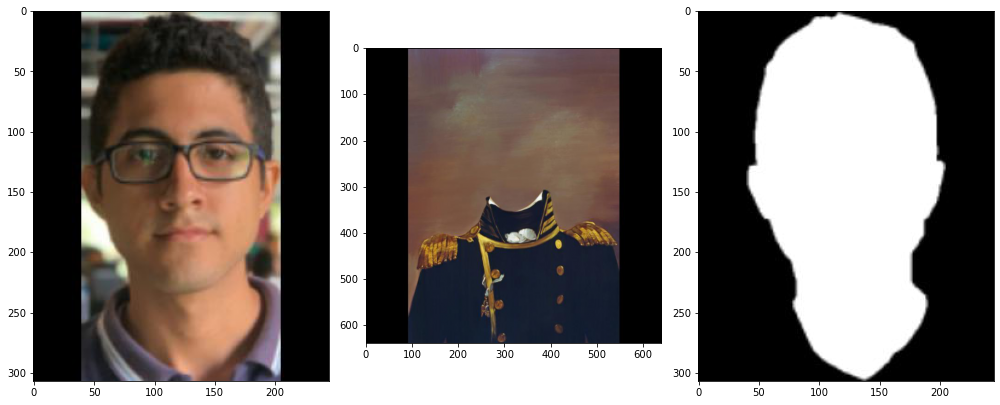

In [67]:
plots_all(image_src, target_img, mask_img)

 # Poisson Blending

## Preprocess Source Image and Mask Image

### Mask

In [68]:
canvas_mask = make_canvas_mask(x_start, y_start, target_img, mask_img)

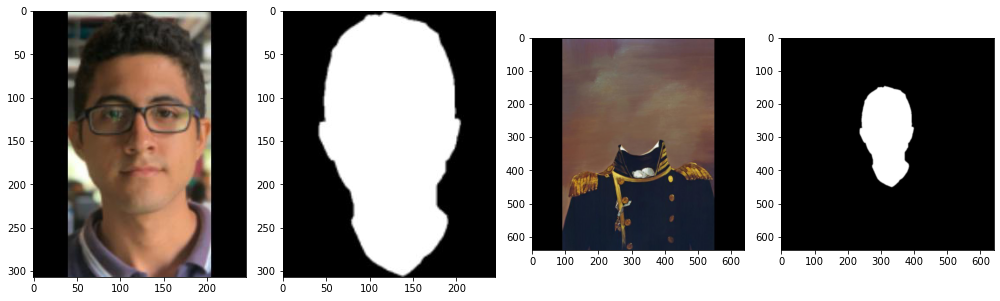

In [69]:
plots_all(image_src, mask_img, target_img, canvas_mask)

### Source Image

In [70]:
preprocess_image_src = preprocess_source_image(x_start, y_start, target_img, image_src)

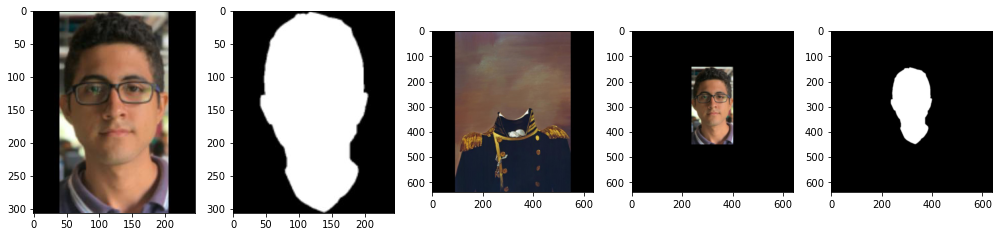

In [71]:
plots_all(image_src, mask_img, target_img, preprocess_image_src, canvas_mask)

# Naive Copy

In [72]:
image_data = {'source': preprocess_image_src,
              'mask': canvas_mask,
              'target': target_img}

In [73]:
def naive_copy(image_data):
    src = image_data['source']
    mask = image_data['mask']
    target = image_data['target'].copy()
    target[:,:,:] = target[:,:,:] * (1 -  np.expand_dims(mask, 2)) + src * np.expand_dims(mask, 2)
    return target

In [74]:
naive_blending = naive_copy(image_data)

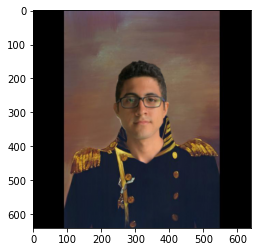

In [75]:
plots_all(naive_blending)